<a href="https://colab.research.google.com/github/cherj314/Python/blob/main/Lab_6_Scaler_%2B_Pipelines_%2B_Gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score


In [96]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

--2023-11-06 20:12:57--  https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3bcdf646c738ce0bb067566e99.dl.dropboxusercontent.com/cd/0/inline/CHAKphDMLyyJ9C89uM0ur8QeFqr2l-R3WOZhEM8MfX6ifiLmQbLQVWeIvVKHcpnzUbKhfZG4REpa1layNFzgCvNFfCqygQiJptFzDh4Qm_4zI9F7kGMbdI3ozLl9jLQUZjvouURueMIAhds9ksmzY39N/file# [following]
--2023-11-06 20:12:58--  https://uc3bcdf646c738ce0bb067566e99.dl.dropboxusercontent.com/cd/0/inline/CHAKphDMLyyJ9C89uM0ur8QeFqr2l-R3WOZhEM8MfX6ifiLmQbLQVWeIvVKHcpnzUbKhfZG4REpa1layNFzgCvNFfCqygQiJptFzDh4Qm_4zI9F7kGMbdI3ozLl9jLQUZjvouURueMIAhds9ksmzY39N/file
Resolving uc3bcdf646c738ce0bb067566e99.dl.dropboxusercontent.com (uc3bcdf646c738ce0bb067566e99.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:

In [103]:
# Load the Titanic dataset (assuming you have the dataset CSV file)
titanic_df = pd.read_csv("titanic.csv")

print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [104]:
# Define 'X' and 'y' based on having and not having 'Survived'
X = titanic_df.drop("Survived", axis='columns')

y = titanic_df['Survived']


In [99]:
# Count the percentage of missing values in each column
missing_percentage = titanic_df.isnull().mean() * 100

In [105]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


# drop all nulls
titanic_df.dropna(inplace=True)

titanic_df



<ipython-input-105-381a82ec4381>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.dropna(inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,0
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
889,1,male,26.0,0,0,30.0000,1


In [106]:
# Convert categorical variables ('Sex') to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'])

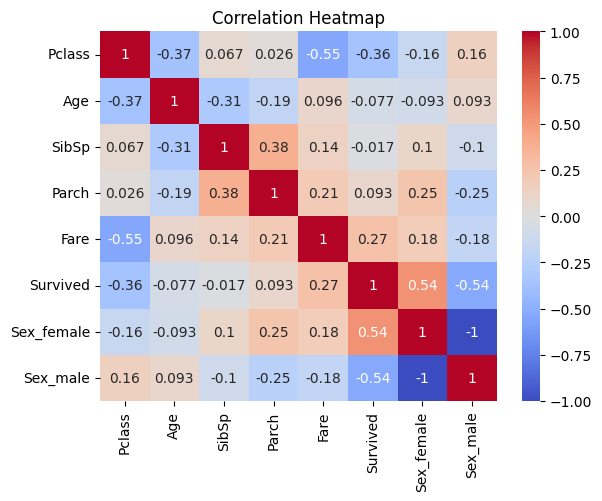

In [107]:
# Create a correlation matrix
correlation_matrix = titanic_df.corr()

# Create a heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
""

In [29]:


# Split the data into training and testing sets (e.g., 80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, make_scorer

# Split the data into training and testing sets (e.g., 80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for 1. standard scaler and 2. the chosen algorithm
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# SVM Pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define parameter grids
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30]
}

param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear']  # Choose an appropriate solver
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Create GridSearchCV instances for each algorithm with multiple scoring metrics
# Make sure to set refit='f1_score'
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring=scoring, refit='f1_score', cv=5)
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, scoring=scoring, refit='f1_score', cv=5)
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, scoring=scoring, refit='f1_score', cv=5)

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters based on F1
best_params_rf = grid_search_rf.best_params_
best_params_lr = grid_search_lr.best_params_
best_params_svm = grid_search_svm.best_params_

# Access the results for both scoring metrics
results_rf = grid_search_rf.cv_results_
results_lr = grid_search_lr.cv_results_
results_svm = grid_search_svm.cv_results_


# Print the results for accuracy and F1
print("Random Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])
print("F1 scores:", results_rf['mean_test_f1_score'])
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)

print("\nLogistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy'])
print("F1 scores:", results_lr['mean_test_f1_score'])
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)

print("\nSVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])
print("F1 scores:", results_svm['mean_test_f1_score'])
print("\nBest Parameters for SVM based on F1:", best_params_svm)


ValueError: ignored

In [ ]:
# Extract the mean test accuracy from the cross validation results
mean_test_f1_rf = ...
mean_test_f1_lr = ...
mean_test_f1_svm = ...

# get the f1 score for the test set
test_f1_rf = ...
test_f1_lr = ...
test_f1_svm = ...

# Create a dataframe for the heatmap
import pandas as pd

data = {
    'Algorithm': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Mean Validation F1 Score': [mean_test_f1_rf, mean_test_f1_lr, mean_test_f1_svm],
    'Test F1 Score': [test_f1_rf, test_f1_lr, test_f1_svm]
}

data = pd.DataFrame(data)
data

### Build a function with the code

In [ ]:

# Define parameter grids
param_grid_rf = {
    'classifier__n_estimators': ...,
    'classifier__max_depth': ...
}

param_grid_lr = {
    'classifier__C': ...,
    'classifier__penalty': ...,
    'classifier__solver': ...
}

param_grid_svm = {
    'classifier__C': ...,
    'classifier__kernel': ...
}

# Define the scoring metrics you want to use
scoring = {
    'accuracy': ...,
    'f1_score': ...
}

# Create pipelines for each algorithm with StandardScaler
rf_pipeline = ...

lr_pipeline = ...

svm_pipeline = ...

def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):

    print(f'Model name: {name} \n')
    # Create a GridSearchCV instance for the pipeline
    grid_search = ...

    # Fit the model
    ...

    # Make predictions on the test set
    test_predictions = ...

    # Calculate accuracy and F1 score on the test set
    accuracy = ...
    f1 = ...

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)


# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)


# Call the function for Logistic Regression
evaluate_classifier('lr', lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)

# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)


### MLOps and tracking the results - Optional

In [ ]:
pip install scikit-learn wandb

In [ ]:
import wandb

# Define parameter grids
param_grid_rf = {...
}

param_grid_lr = {...
}

param_grid_svm = {...
}

# Define the scoring metrics you want to use
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# Create pipelines for each algorithm with StandardScaler
rf_pipeline = Pipeline([...
])

lr_pipeline = Pipeline([...
])

svm_pipeline = Pipeline([...
])

def evaluate_classifier(name, pipeline, param_grid, scoring, X_train, y_train, X_test, y_test):


    # Initialize W&B
    wandb.init(name=name, project='project_ENSF_611')


    # Create a GridSearchCV instance for the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='f1_score')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Log the results to W&B
    wandb.log({'Algorithm': name})
    wandb.log({"Best F1 Score": grid_search.best_score_})
    wandb.log({"Best Parameters": grid_search.best_params_})

    # Make predictions on the test set
    test_predictions = grid_search.predict(X_test)

    # Calculate accuracy and F1 score on the test set
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

    # Log test results to W&B
    wandb.log({"Test Accuracy": accuracy})
    wandb.log({"Test F1 Score": f1})

    # Print test results
    print("Test Accuracy:", accuracy)
    print("Test F1 Score:", f1)

# Example usage for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15]
}

# Call the function for Random Forest
evaluate_classifier('rf', rf_pipeline, param_grid_rf, scoring, X_train, y_train, X_test, y_test)

# Example usage for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1'],
    'classifier__solver': ['liblinear', 'saga']
}

# Call the function for Logistic Regression
evaluate_classifier('lr' ,lr_pipeline, param_grid_lr, scoring, X_train, y_train, X_test, y_test)

# Example usage for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# Call the function for SVM
evaluate_classifier('svm', svm_pipeline, param_grid_svm, scoring, X_train, y_train, X_test, y_test)
